In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [89]:
class hpstrHistFile(uproot.ReadOnlyDirectory) :
    def __init__(self, fp, analysis) :
        super().__init__(f'{fp}:{analysis}')
        self.__analysis = analysis
        
    def __getattr__(self, name) :
        if name in self.__dict__ :
            return self.__dict__[name]
        
        return self[f'{self.__analysis}_{name}']

## Plotting HPS Analysis Histograms
Histograms produced by using `hpstr` to analyze ntuples decoded from lcio files.

### Dependencies
- uproot
- matplotlib
- numpy
- hist[plot]

In [91]:
f = uproot.open('2016-subsample/hists/hist_2016_subsample_007800_run_158.root:full_trident')

In [94]:
selections = ['pre_time_cut','pre_fiducial_cut','final_selection']

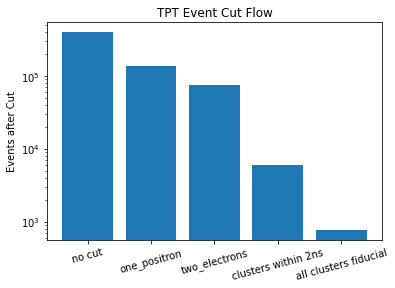

In [92]:
plt.bar(['no cut', 'one_positron','two_electrons','clusters within 2ns','all clusters fiducial'],
        f['event_selection_cutflow'].values())
plt.xticks(rotation = 15)
plt.yscale('log')
plt.title('TPT Event Cut Flow')
plt.ylabel('Events after Cut')
plt.show()

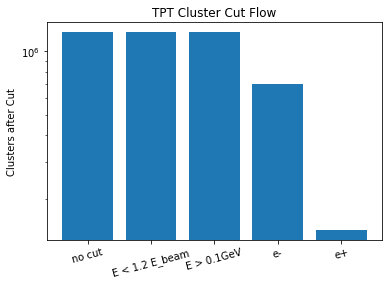

In [81]:
plt.bar(['no cut', 'E < 1.2 E_beam', 'E > 0.1GeV', 'e-', 'e+'],
        f['cluster_selection_cutflow'].values())
plt.xticks(rotation = 15)
plt.yscale('log')
plt.ylabel('Clusters after Cut')
plt.title('TPT Cluster Cut Flow')
plt.show()

In [98]:
def follow_cuts(hist_name, xlabel) :
    fig, ax = plt.subplots()
    for name in selections :
        f[f'full_trident_{name}_{hist_name}_h'].to_hist().plot(ax=ax,label=name)
    plt.legend()
    plt.ylabel('Event Count')
    plt.yscale('log')
    plt.xlabel(xlabel)
    plt.title('Three Prong Tridents : Run 007800 Partition 158')
    plt.show()

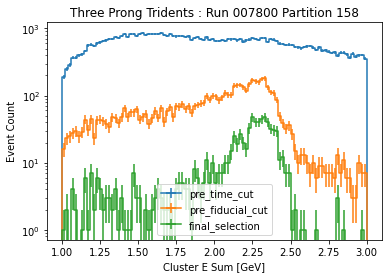

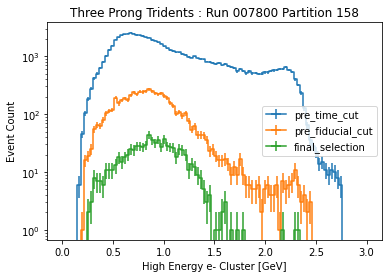

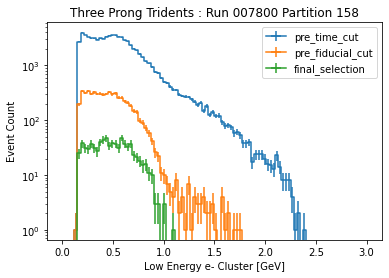

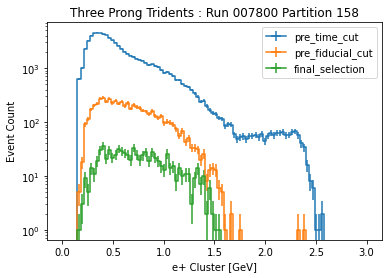

In [99]:
follow_cuts('cluster_E_sum','Cluster E Sum [GeV]')
follow_cuts('electron0_cluster_E', 'High Energy e- Cluster [GeV]')
follow_cuts('electron1_cluster_E', 'Low Energy e- Cluster [GeV]')
follow_cuts('positron_cluster_E', 'e+ Cluster [GeV]')

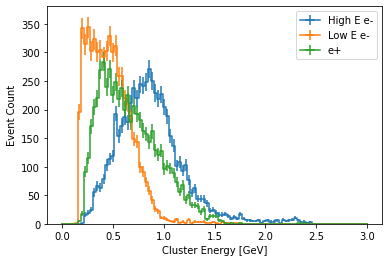

In [53]:
fig, ax = plt.subplots()
f['full_trident/full_trident_electron0_cluster_E_h'].to_hist().plot(ax=ax, label='High E e-')
f['full_trident/full_trident_electron1_cluster_E_h'].to_hist().plot(ax=ax, label='Low E e-')
f['full_trident/full_trident_positron_cluster_E_h'].to_hist().plot(ax=ax, label='e+')
plt.legend()
plt.ylabel('Event Count')
plt.xlabel('Cluster Energy [GeV]')
plt.show()

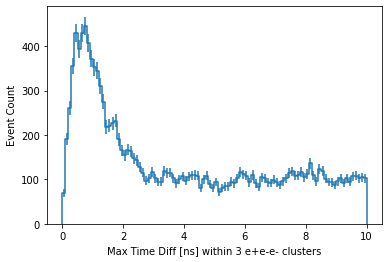

In [54]:
fig, ax = plt.subplots()
f['full_trident/full_trident_max_time_diff_h'].to_hist().plot(ax=ax)
plt.ylabel('Event Count')
plt.xlabel('Max Time Diff [ns] within 3 e+e-e- clusters')
plt.show()

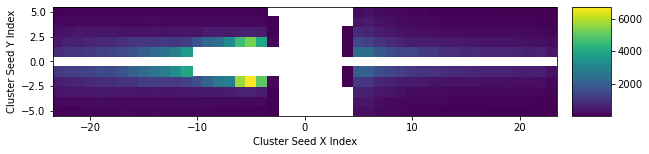

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(10,2)
f['full_trident/full_trident_cluster_seed_pos_hh'].to_hist().plot(ax=ax, cmin=1)
plt.ylabel('Cluster Seed Y Index')
plt.xlabel('Cluster Seed X Index')
plt.show()